1、Multiple ensembles shown to work. Analysis of why one ensemble performs better or worse than others. 
2、Analysis of interaction between hyperparameters and ensemble composition. 
3、Analysis of interaction between training/validation/testing and ensembles and hyperparameters. 
4、ROC created and all models/ensembles plotted on the same graph. ROC index calculated.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# load datasets
def load_data(file):
    df_data = pd.read_csv(file) # read data by pandas
    df_data.replace(['?'],[0], inplace =True) # replace '?'
    df_data.fillna(0, inplace =True) # fillna with 0
    return df_data

df_data1 = load_data('ozone_onehr.csv')
df_data2 = load_data('ozone_eighthr.csv')

In [3]:
# training testing split, positive data is little, so just split dataset into two part.
def data_split(df_data, alpha):
    X_train, X_test, y_train, y_test = train_test_split(\
                            df_data.iloc[:, 1:-1].values, 
                            df_data.iloc[:, -1].values, 
                            test_size=alpha, 
                            random_state=42)
    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = data_split(df_data1, 0.4) #split data with test_size=0.4

In [5]:
# define XGB model
clf1 = XGBClassifier(max_depth=3, 
                     learning_rate=0.1, 
                     n_estimators=100, 
                     verbosity=1, 
                     objective='binary:logistic', 
                     booster='gbtree', 
                     tree_method='auto', 
                     n_jobs=4, 
                     )

# define RF model
clf2 = RandomForestClassifier(n_estimators=100,
                              criterion='gini',
                              max_depth=None, 
                              max_features='auto', 
                              min_samples_leaf=1, 
                              min_samples_split=2,
                              min_weight_fraction_leaf=0.0, 
                              n_jobs=4)

# 1) Multiple ensembles shown to work. Analysis of why one ensemble performs better or worse than others

In [6]:
# train model
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

# predict
y_pre1 = clf1.predict_proba(X_test)[:, 1]
y_pre2 = clf2.predict_proba(X_test)[:, 1]

# calculate ROC index 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pre1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pre2)

ROC_index_XGB = [(i,j) for i,j in zip(fpr1, tpr1)]
print("First 5 ROC_index of XGB is:", ROC_index_XGB[:5]) # print first 5 ROC index 

ROC_index_RF = [(i,j) for i,j in zip(fpr2, tpr2)]
print("First 5 ROC_index of RF is:", ROC_index_RF[:5]) # print first 5 ROC index 

First 5 ROC_index of XGB is: [(0.0, 0.0), (0.0, 0.04), (0.00202020202020202, 0.04), (0.00202020202020202, 0.08), (0.005050505050505051, 0.08)]
First 5 ROC_index of RF is: [(0.0, 0.0), (0.00101010101010101, 0.0), (0.00101010101010101, 0.08), (0.00202020202020202, 0.08), (0.00404040404040404, 0.08)]


AUC of XGB is: 0.9171717171717171
AUC of RF is: 0.8769494949494949


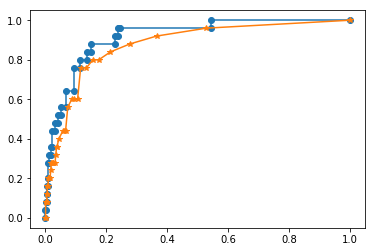

In [7]:
# calculate AUC and print
auc_score1 = metrics.roc_auc_score(y_test,y_pre1)
print('AUC of XGB is:', auc_score1)
auc_score2 = metrics.roc_auc_score(y_test,y_pre2)
print('AUC of RF is:',auc_score2)

# plot ROC of the models
plt.plot(fpr1, tpr1, marker = 'o', label="xgb")
plt.plot(fpr2, tpr2, marker = '*', label="RF")
plt.show()

XGBoost is one of boosting method, RF is one of bagging method, random forests and boosted trees are really the same models; the difference arises from how we train them. XGBoost simply take the gradient, and another important thing is XGBoost has regularization term. So XGBoost perform better than RF.

# 2) Analysis of interaction between hyperparameters and ensemble composition

In [8]:
# define XGB with different max_depth
xgb1 = XGBClassifier(max_depth=3, 
                     learning_rate=0.1, 
                     n_estimators=100, 
                     objective='binary:logistic', 
                     booster='gbtree', 
                     n_jobs=4, 
                     )

xgb2 = XGBClassifier(max_depth=5, 
                     learning_rate=0.1, 
                     n_estimators=100, 
                     objective='binary:logistic', 
                     booster='gbtree', 
                     n_jobs=4, 
                     )

xgb3 = XGBClassifier(max_depth=3, 
                     learning_rate=0.01, 
                     n_estimators=100, 
                     objective='binary:logistic', 
                     booster='gbtree', 
                     n_jobs=4, 
                     )

In [9]:
# train model
xgb1.fit(X_train, y_train)
xgb2.fit(X_train, y_train)
xgb3.fit(X_train, y_train)


# predict
y_pre1 = xgb1.predict_proba(X_test)[:, 1]
y_pre2 = xgb2.predict_proba(X_test)[:, 1]
y_pre3 = xgb3.predict_proba(X_test)[:, 1]

# calculate ROC index 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pre1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pre2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_pre3)

ROC_index_XGB1 = [(i,j) for i,j in zip(fpr1, tpr1)]
print("First 5 ROC_index of XGB1 is:", ROC_index_XGB1[:5]) # print first 5 ROC index

ROC_index_XGB2 = [(i,j) for i,j in zip(fpr2, tpr2)]
print("First 5 ROC_index of XGB2 is:", ROC_index_XGB2[:5]) # print first 5 ROC index

ROC_index_XGB3 = [(i,j) for i,j in zip(fpr3, tpr3)]
print("First 5 ROC_index of XGB3 is:\n", ROC_index_XGB3[:5]) # print first 5 ROC index

First 5 ROC_index of XGB1 is: [(0.0, 0.0), (0.0, 0.04), (0.00202020202020202, 0.04), (0.00202020202020202, 0.08), (0.005050505050505051, 0.08)]
First 5 ROC_index of XGB2 is: [(0.0, 0.0), (0.0, 0.04), (0.0, 0.08), (0.0030303030303030303, 0.08), (0.0030303030303030303, 0.12)]
First 5 ROC_index of XGB3 is:
 [(0.0, 0.0), (0.0, 0.04), (0.007070707070707071, 0.04), (0.007070707070707071, 0.08), (0.00808080808080808, 0.08)]


AUC of XGB1 is: 0.9171717171717171
AUC of XGB2 is: 0.9052929292929293
AUC of XGB3 is: 0.8486464646464646


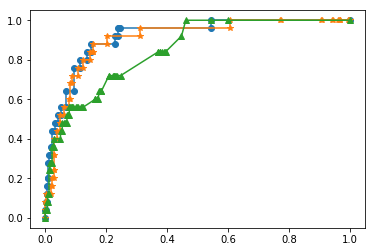

In [10]:
# calculate AUC
auc_score1 = metrics.roc_auc_score(y_test,y_pre1)
print('AUC of XGB1 is:', auc_score1)
auc_score2 = metrics.roc_auc_score(y_test,y_pre2)
print('AUC of XGB2 is:',auc_score2)
auc_score3 = metrics.roc_auc_score(y_test,y_pre3)
print('AUC of XGB3 is:',auc_score3)

# plot ROC of the models
plt.plot(fpr1, tpr1, marker = 'o')
plt.plot(fpr2, tpr2, marker = '*')
plt.plot(fpr3, tpr3, marker = '^')

plt.show()

'max_depth' in xgb1 is 3 and in xgb2 is 5, other hyperparameters are same, but xgb1's AUC is larger than xgb2's. 'learning_rate' in xgb1 is 0.1 and in xgb3 is 0.01, other hyperparameters are same, but xgb1's AUC is larger than xgb2's.

In [11]:
# define RF models with different n_estimators
RF1 = RandomForestClassifier(n_estimators=100)

RF2 = RandomForestClassifier(n_estimators=200)

RF3 = RandomForestClassifier(n_estimators=300)

In [12]:
# train model
RF1.fit(X_train, y_train)
RF2.fit(X_train, y_train)
RF3.fit(X_train, y_train)

# predict
y_pre1 = RF1.predict_proba(X_test)[:, 1]
y_pre2 = RF2.predict_proba(X_test)[:, 1]
y_pre3 = RF3.predict_proba(X_test)[:, 1]

# calculate ROC index 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pre1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pre2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_pre3)

ROC_index_RF1 = [(i,j) for i,j in zip(fpr1, tpr1)]
print("First 5 ROC_index of RF1 is:", ROC_index_XGB1[:5]) # print first 5 ROC index

ROC_index_RF2 = [(i,j) for i,j in zip(fpr2, tpr2)]
print("First 5 ROC_index of RF2 is:", ROC_index_XGB2[:5]) # print first 5 ROC index

ROC_index_RF3 = [(i,j) for i,j in zip(fpr3, tpr3)]
print("First 5 ROC_index of RF3 is:\n", ROC_index_XGB3[:5]) # print first 5 ROC index

First 5 ROC_index of RF1 is: [(0.0, 0.0), (0.0, 0.04), (0.00202020202020202, 0.04), (0.00202020202020202, 0.08), (0.005050505050505051, 0.08)]
First 5 ROC_index of RF2 is: [(0.0, 0.0), (0.0, 0.04), (0.0, 0.08), (0.0030303030303030303, 0.08), (0.0030303030303030303, 0.12)]
First 5 ROC_index of RF3 is:
 [(0.0, 0.0), (0.0, 0.04), (0.007070707070707071, 0.04), (0.007070707070707071, 0.08), (0.00808080808080808, 0.08)]


AUC of RF1 is: 0.8909090909090909
AUC of RF2 is: 0.8964444444444444
AUC of RF3 is: 0.8993939393939394


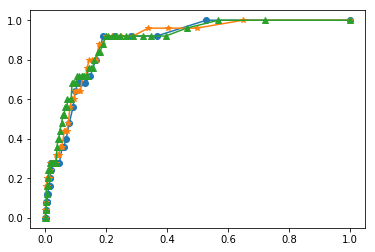

In [13]:
# calculate AUC
auc_score1 = metrics.roc_auc_score(y_test,y_pre1)
print('AUC of RF1 is:', auc_score1)
auc_score2 = metrics.roc_auc_score(y_test,y_pre2)
print('AUC of RF2 is:',auc_score2)
auc_score3 = metrics.roc_auc_score(y_test,y_pre3)
print('AUC of RF3 is:',auc_score3)

# plot ROC of the models
plt.plot(fpr1, tpr1, marker = 'o')
plt.plot(fpr2, tpr2, marker = '*')
plt.plot(fpr3, tpr3, marker = '^')

plt.show()

'n_estimators' in RF1 is 100 and in RF2 is 200 and in RF3 is 300, other hyperparameters are same, but RF2's AUC is larger than others. Because the model is underfitted at the beginning, then overfitted.

# 3) Analysis of interaction between training/validation/testing and ensembles and hyperparameters.

In [14]:
# data split with test_size=0.2
X_train1, X_test1, y_train1, y_test1 = data_split(df_data1, 0.2)
clf1 = XGBClassifier().fit(X_train1, y_train1) # train by xgb model

# data split with test_size=0.3
X_train2, X_test2, y_train2, y_test2 = data_split(df_data1, 0.3)
clf2 = XGBClassifier().fit(X_train2, y_train2) # train by xgb model

# data split with test_size=0.7
X_train3, X_test3, y_train3, y_test3 = data_split(df_data1, 0.7)
clf3 = XGBClassifier().fit(X_train3, y_train3) # train by xgb model

# predict
y_pre1 = clf1.predict_proba(X_test1)[:, 1]
y_pre2 = clf2.predict_proba(X_test2)[:, 1]
y_pre3 = clf3.predict_proba(X_test3)[:, 1]

# calculate ROC index 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test1, y_pre1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, y_pre2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test3, y_pre3)

ROC_index_XGB1 = [(i,j) for i,j in zip(fpr1, tpr1)]
print("First 5 ROC_index of XGB1 is:", ROC_index_XGB1[:5]) # print first 5 ROC index

ROC_index_XGB2 = [(i,j) for i,j in zip(fpr2, tpr2)]
print("First 5 ROC_index of XGB2 is:", ROC_index_XGB2[:5]) # print first 5 ROC index

ROC_index_XGB3 = [(i,j) for i,j in zip(fpr3, tpr3)]
print("First 5 ROC_index of XGB3 is:", ROC_index_XGB3[:5]) # print first 5 ROC index

First 5 ROC_index of XGB1 is: [(0.0, 0.0), (0.002004008016032064, 0.0), (0.006012024048096192, 0.0), (0.006012024048096192, 0.1111111111111111), (0.014028056112224449, 0.1111111111111111)]
First 5 ROC_index of XGB2 is: [(0.0, 0.0), (0.0, 0.05), (0.004048582995951417, 0.05), (0.004048582995951417, 0.15), (0.005398110661268556, 0.15)]
First 5 ROC_index of XGB3 is: [(0.0, 0.0), (0.000580046403712297, 0.0), (0.0034802784222737818, 0.0), (0.0034802784222737818, 0.038461538461538464), (0.0063805104408352666, 0.038461538461538464)]


AUC of XGB1 is: 0.8908928969049209
AUC of XGB2 is: 0.9114709851551956
AUC of XGB3 is: 0.8754629216491165


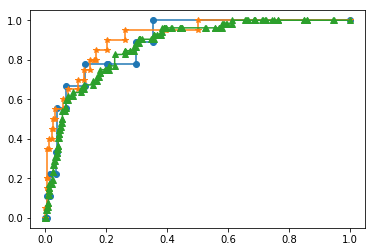

In [15]:
# calculate AUC
auc_score1 = metrics.roc_auc_score(y_test1, y_pre1)
print('AUC of XGB1 is:', auc_score1)
auc_score2 = metrics.roc_auc_score(y_test2, y_pre2)
print('AUC of XGB2 is:',auc_score2)
auc_score3 = metrics.roc_auc_score(y_test3, y_pre3)
print('AUC of XGB3 is:',auc_score3)

# plot ROC of the models
plt.plot(fpr1, tpr1, marker = 'o')
plt.plot(fpr2, tpr2, marker = '*')
plt.plot(fpr3, tpr3, marker = '^')

plt.show()

'test_size' of three dataset is 0.2, 0.3, 0.4, when I increase 'test_size', the AUC of the model is alse increase; but when 'test_size' increase too large, AUC begin decrease. When 'test_size' is small, more data will be use for training, when is large, less data will be use for training, it has better choosing appropriate 'test_size'.